# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第11课：
## 官方示例讲解-基于介数中心性来绘制网络节点和连边的colormap图

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.10.4

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

In [3]:
def plot_betweenness(g, ax, cax1, cax2):
    '''用颜色条绘制点/边的介数

    参数:
        g: 要绘制的图.
        ax: 图的坐标轴
        cax1: 节点介数色阶条的坐标轴
        cax2: 连边介数色阶条的坐标轴
    '''

    # 计算节点和连边的介数，并将其缩放到0.0到1.0之间
    vertex_betweenness = g.betweenness()
    edge_betweenness = g.edge_betweenness()
    scaled_vertex_betweenness = ig.rescale(vertex_betweenness, clamp=True)
    scaled_edge_betweenness = ig.rescale(edge_betweenness, clamp=True)
    print(f"vertices: {min(vertex_betweenness)} - {max(vertex_betweenness)}")
    print(f"edges: {min(edge_betweenness)} - {max(edge_betweenness)}")

    # 定义介数与颜色之间的映射
    cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["blue", "red"])
    cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lime", "red"])


    g.vs["color"] = [cmap1(betweenness) for betweenness in scaled_vertex_betweenness]
    g.vs["size"]  = ig.rescale(vertex_betweenness, (0.1, 0.5))
    g.es["color"] = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]
    g.es["width"] = ig.rescale(edge_betweenness, (0.5, 1.0))
    ig.plot(
        g,
        target=ax,
        layout="fruchterman_reingold",
        vertex_frame_width=0.2,
    )

    norm1 = ScalarMappable(norm=Normalize(0, max(scaled_vertex_betweenness)), cmap=cmap1)
    norm2 = ScalarMappable(norm=Normalize(0, max(scaled_edge_betweenness)), cmap=cmap2)
    plt.colorbar(norm1, cax=cax1, orientation="horizontal", label='Vertex Betweenness')
    plt.colorbar(norm2, cax=cax2, orientation="horizontal", label='Edge Betweenness')

vertices: 0.0 - 14.0
edges: 1.5 - 16.0
vertices: 0.0 - 753.8235063912693
edges: 8.951984126984126 - 477.30745059034535


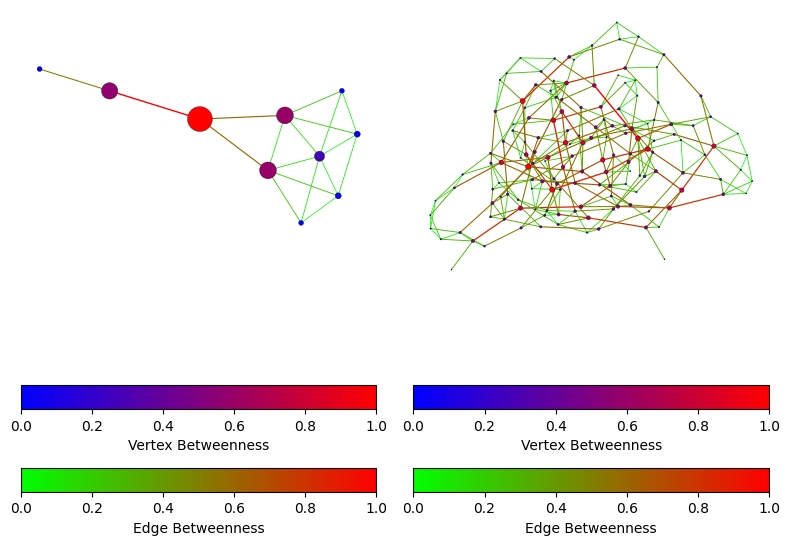

In [4]:
# 生成风筝图和WS小世界图
random.seed(0)
g1 = ig.Graph.Famous("Krackhardt_Kite")
g2 = ig.Graph.Watts_Strogatz(dim=1, size=150, nei=2, p=0.1)

# 绘制图，每个图用两个颜色条表示节点/边之间的介数
fig, axs = plt.subplots(
    3, 2,
    figsize=(8, 6),
    gridspec_kw=dict(height_ratios=(15, 1, 1)),
    )
# plt.subplots_adjust(bottom=0.3)
# 在我的电脑上，原始的代码会报错
# plot_betweenness(g1, fig, *axs[:, 0])
# plot_betweenness(g2, fig, *axs[:, 1])
# 更改为如下两行代码
plot_betweenness(g1, axs[0, 0], axs[1, 0], axs[2, 0])
plot_betweenness(g2, axs[0, 1], axs[1, 1], axs[2, 1])
fig.tight_layout()
plt.show()